In [3]:
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import operator
from datetime import datetime
import collections
#from astropy.table import Table

#BRANJE DATOTEKE
dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True, delimiter=";")
dict_reader2 = DictReader(open('podatki2.csv', "r", encoding="windows-1250", errors="ignore", newline=''),
                          skipinitialspace=True, delimiter=";", quotechar='"')


FileNotFoundError: [Errno 2] No such file or directory: 'podatki1.csv'

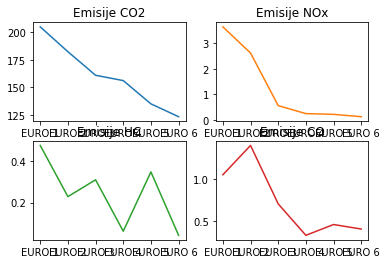

<Figure size 720x720 with 0 Axes>

In [2]:
fig, axs = plt.subplots(2, 2)
plt.figure(figsize=(10,10))
zx, zy = list(), list()
izpustiOznaka = dict()
for row in dict_reader:
    if row["Okoljevarstvena oznaka"] in izpustiOznaka:
        if row["V.7-CO2"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]].append(float(row["V.7-CO2"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]] = []

for key in sorted(izpustiOznaka)[1:]:
    zx.append(key)
    zy.append(sum(izpustiOznaka[key])/len(izpustiOznaka[key]))

axs[0, 0].plot(zx, zy)
axs[0, 0].set_title('Emisije CO2')

dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True, delimiter=";")
#izpustiOznaka
zx, zy = list(), list()
izpustiOznaka = dict()
for row in dict_reader:
    if row["Okoljevarstvena oznaka"] in izpustiOznaka:
        if row["V.3-Nox"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]].append(float(row["V.3-Nox"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]] = []

for key in sorted(izpustiOznaka)[1:]:
    zx.append(key)
    zy.append(sum(izpustiOznaka[key])/len(izpustiOznaka[key]))

axs[0, 1].plot(zx, zy, 'tab:orange')
axs[0, 1].set_title('Emisije NOx')

dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True, delimiter=";")
zx, zy = list(), list()
izpustiOznaka = dict()
for row in dict_reader:
    if row["Okoljevarstvena oznaka"] in izpustiOznaka:
        if row["V.2-HC"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]].append(float(row["V.2-HC"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]] = []

for key in sorted(izpustiOznaka)[1:]:
    zx.append(key)
    zy.append(sum(izpustiOznaka[key])/len(izpustiOznaka[key]))

axs[1, 0].plot(zx, zy, 'tab:green')
axs[1, 0].set_title('Emisije HC')

dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True, delimiter=";")
zx, zy = list(), list()
izpustiOznaka = dict()
for row in dict_reader:
    if row["Okoljevarstvena oznaka"] in izpustiOznaka:
        if row["V.1-CO"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]].append(float(row["V.1-CO"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            izpustiOznaka[row["Okoljevarstvena oznaka"]] = []

for key in sorted(izpustiOznaka)[1:]:
    zx.append(key)
    zy.append(sum(izpustiOznaka[key])/len(izpustiOznaka[key]))

axs[1, 1].plot(zx, zy, 'tab:red')
axs[1, 1].set_title('Emisije CO')
plt.show()

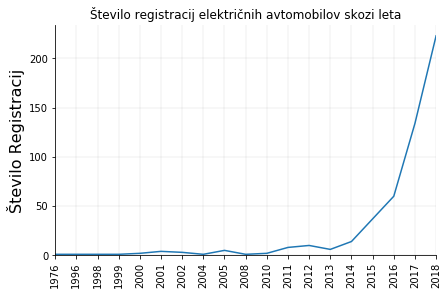

In [3]:
dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True,
                             delimiter=";")
stEle = dict()
zx, zy = list(), list()
for row in dict_reader:
    if row["P.1.3-Vrsta goriva (opis)"] == "Ni goriva" and row[
        "J-Kategorija in vrsta vozila (opis)"] == "osebni avtomobil":
        if row["2A-Datum prve registracije vozila v SLO"][-4:] in stEle:
            if row["P.1.3-Vrsta goriva (opis)"] != "":
                stEle[row["2A-Datum prve registracije vozila v SLO"][-4:]] += 1
        else:
            if row["2A-Datum prve registracije vozila v SLO"] != "":
                stEle[row["2A-Datum prve registracije vozila v SLO"][-4:]] = 1

for key in sorted(stEle):
    zx.append(key)
    zy.append(stEle[key])

plt.plot(zx, zy)
plt.xticks(rotation='vertical')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0)
plt.margins(0)
plt.title("Število registracij električnih avtomobilov skozi leta")
plt.ylabel('Število Registracij', fontsize=16)
plt.show()

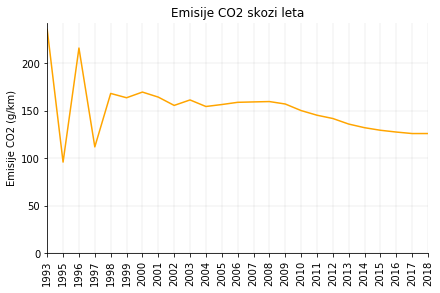

In [4]:
CO2leta = dict()
dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True, delimiter=";")
zx, zy = list(), list()
for row in dict_reader:
    if row["2A-Datum prve registracije vozila v SLO"][-4:] in CO2leta:
        if row["V.7-CO2"] != "":
            CO2leta[row["2A-Datum prve registracije vozila v SLO"][-4:]].append(float(row["V.7-CO2"].replace(",", ".")))
    else:
        if row["2A-Datum prve registracije vozila v SLO"] != "":
            CO2leta[row["2A-Datum prve registracije vozila v SLO"][-4:]] = []

for key in sorted(CO2leta):
    if len(CO2leta[key]) != 0 and int(key) > 1992:
        if sum(CO2leta[key]) / len(CO2leta[key]) != 0:
            zx.append(key)
            zy.append(sum(CO2leta[key]) / len(CO2leta[key]))

plt.plot(zx, zy, color="orange")
plt.xticks(rotation='vertical')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0)
plt.margins(0)
plt.ylabel("Emisije CO2 (g/km)")
plt.title("Emisije CO2 skozi leta")
plt.title
plt.show()

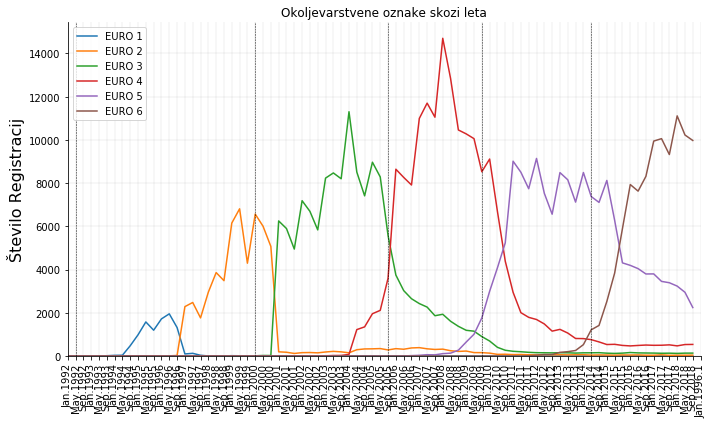

In [5]:
plt.figure(figsize=(10,6))
for oznaka in ["EURO 1", "EURO 2", "EURO 3", "EURO 4", "EURO 5", "EURO 6"]:
    dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True,
                             delimiter=";")
    zx, zy = list(), list()
    oznakeLeta = dict()
    for row in dict_reader:
        date = ""
        if row["2A-Datum prve registracije vozila v SLO"] == "":
            continue
        if int(row["2A-Datum prve registracije vozila v SLO"][-4:]) < 1992:
            continue
        month = row["2A-Datum prve registracije vozila v SLO"].split(".")[1]
        year = row["2A-Datum prve registracije vozila v SLO"].split(".")[2]
        if int(month) < 5:
            date = year + ".1"
        elif int(month) < 9:
            date += year + ".5"
        else:
            date += year + ".9"

        if date in oznakeLeta:
            if row["Okoljevarstvena oznaka"] == oznaka:
                oznakeLeta[date] += 1
        else:
            if row["2A-Datum prve registracije vozila v SLO"] != "":
                oznakeLeta[date] = 0

    for key in sorted(oznakeLeta):
        if key[-1] == "1":
            zx.append("Jan." + key[:-2])
        elif key[-1] == "5":
            zx.append("May." + key[:-2])
        else:
            zx.append("Sep." + key[:-2])
        zy.append(oznakeLeta[key])

    plt.plot(zx, zy, label=oznaka)


xposition = ["May.1992", "Jan.1996.1", "Jan.2000", "Sep.2005", "Sep.2009", "May.2014"]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=0.5)
plt.xticks(rotation='vertical')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0)
plt.margins(0)
plt.ylabel('Število Registracij', fontsize=16)
plt.legend()
plt.title("Okoljevarstvene oznake skozi leta")
plt.tight_layout()
plt.show()

In [6]:
def emisije_st():
    # Pogostost uporabe (registriranih vozil) po emisijskih oznakah
    oznake = defaultdict(int)
    for a in [dict_reader, dict_reader2]:
        for row in a:
            if row["Okoljevarstvena oznaka"]:
                oznake[row["Okoljevarstvena oznaka"]] += 1

        oznake_x = sorted(oznake.items(), key=operator.itemgetter(1), reverse=True)[:10]

        imena_oznak = [k for k, v in oznake_x]
        vredn_oznak = [v for k, v in oznake_x]

        y_pos = np.arange(len(imena_oznak))

        plt.barh(y_pos, vredn_oznak, align='center', color='green', ecolor='black')
        plt.yticks(y_pos, imena_oznak)[::-1]
        plt.xlabel('Število registracij')
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        plt.title('Najpogostejše emisijske oznake')

    plt.show()


def emisije_prve_oznake():
    # Prvič registrirane emisijske oznake EURO
    prve_emis = []
    for a in [dict_reader, dict_reader2]:
        for row in a:
            if row["2A-Datum prve registracije vozila v SLO"] and \
                row["Okoljevarstvena oznaka"] and row["Okoljevarstvena oznaka"].startswith("EURO"):
                timestamp = row["2A-Datum prve registracije vozila v SLO"].split('.')
                ts = datetime(int(timestamp[2]), int(timestamp[1]), int(timestamp[0]))
                prve_emis.append((row["Okoljevarstvena oznaka"], ts))

    prve_sortirane = sorted(prve_emis, key=lambda tup: tup[1])

    registrirane_ozn = defaultdict(datetime)
    for oznaka, datum in prve_sortirane:
        if oznaka not in registrirane_ozn:
            registrirane_ozn[oznaka] = datum.strftime('%d. %m. %Y')

    t = Table()
    t['Oznaka'] = list(registrirane_ozn.keys())
    t['Prvič registirane'] = list(registrirane_ozn.values())

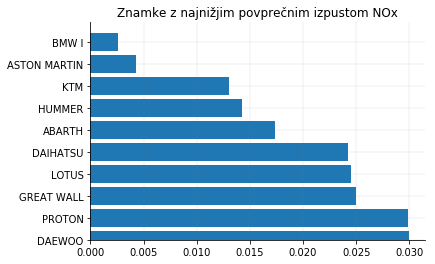

In [7]:
znamka = dict()
dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True,
                             delimiter=";")
for row in dict_reader:
    if row["D.1-Znamka"] in znamka:
        if row["V.3-Nox"] != "":
            if row["J-Kategorija in vrsta vozila (opis)"] == "osebni avtomobil":
                znamka[row["D.1-Znamka"]].append(float(row["V.3-Nox"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            znamka[row["D.1-Znamka"]] = []


zx,zy = list(), list()
z = list()
for key in znamka:
    if len(znamka[key]) != 0:
        if sum(znamka[key]) / len(znamka[key]) != 0:
            z.append((key, sum(znamka[key]) / len(znamka[key])))

z = sorted(z, key=lambda tup: tup[1])[:10]

for x, y in z:
    zx.append(x)
    zy.append(y)

plt.barh(zx[::-1], zy[::-1])
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0)
plt.title("Znamke z najnižjim povprečnim izpustom NOx")

plt.show()

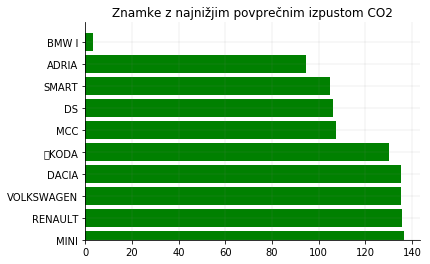

In [8]:
znamka = dict()
dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True,
                             delimiter=";")
for row in dict_reader:
    if row["D.1-Znamka"] in znamka:
        if row["V.7-CO2"] != "":
            if row["J-Kategorija in vrsta vozila (opis)"] == "osebni avtomobil":
                znamka[row["D.1-Znamka"]].append(float(row["V.7-CO2"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            znamka[row["D.1-Znamka"]] = []


zx,zy = list(), list()
z = list()
for key in znamka:
    if len(znamka[key]) != 0:
        if sum(znamka[key]) / len(znamka[key]) != 0:
            z.append((key, sum(znamka[key]) / len(znamka[key])))

z = sorted(z, key=lambda tup: tup[1])[:10]

for x, y in z:
    zx.append(x)
    zy.append(y)

plt.barh(zx[::-1], zy[::-1], color="green")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0)
plt.title("Znamke z najnižjim povprečnim izpustom CO2")

plt.show()

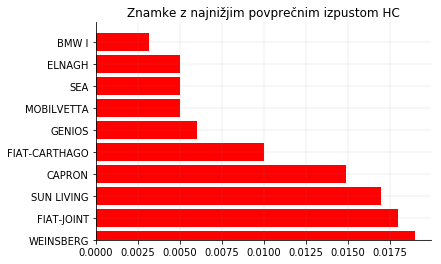

In [9]:
znamka = dict()
dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True,
                             delimiter=";")
for row in dict_reader:
    if row["D.1-Znamka"] in znamka:
        if row["V.2-HC"] != "":
            if row["J-Kategorija in vrsta vozila (opis)"] == "osebni avtomobil":
                znamka[row["D.1-Znamka"]].append(float(row["V.2-HC"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            znamka[row["D.1-Znamka"]] = []


zx,zy = list(), list()
z = list()
for key in znamka:
    if len(znamka[key]) != 0:
        if sum(znamka[key]) / len(znamka[key]) != 0:
            z.append((key, sum(znamka[key]) / len(znamka[key])))

z = sorted(z, key=lambda tup: tup[1])[:10]

for x, y in z:
    zx.append(x)
    zy.append(y)

plt.barh(zx[::-1], zy[::-1], color="red")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0)
plt.title("Znamke z najnižjim povprečnim izpustom HC")

plt.show()

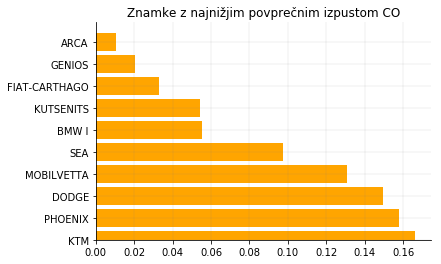

In [10]:
znamka = dict()
dict_reader = DictReader(open('podatki1.csv', "r", encoding="ISO-8859-2", newline=''), skipinitialspace=True,
                             delimiter=";")
for row in dict_reader:
    if row["D.1-Znamka"] in znamka:
        if row["V.1-CO"] != "":
            if row["J-Kategorija in vrsta vozila (opis)"] == "osebni avtomobil":
                znamka[row["D.1-Znamka"]].append(float(row["V.1-CO"].replace(",", ".")))
    else:
        if row["Okoljevarstvena oznaka"] != "":
            znamka[row["D.1-Znamka"]] = []


zx,zy = list(), list()
z = list()
for key in znamka:
    if len(znamka[key]) != 0:
        if sum(znamka[key]) / len(znamka[key]) != 0:
            z.append((key, sum(znamka[key]) / len(znamka[key])))

z = sorted(z, key=lambda tup: tup[1])[:10]

for x, y in z:
    zx.append(x)
    zy.append(y)

plt.barh(zx[::-1], zy[::-1], color="orange")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0)
plt.title("Znamke z najnižjim povprečnim izpustom CO")

plt.show()


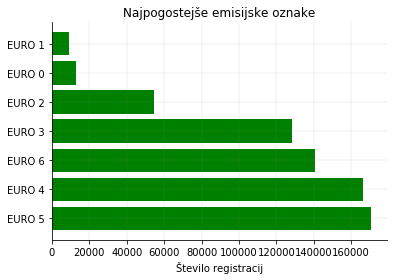

In [11]:
emisije_st()

In [2]:
#BRANJE DATOTEKE
dict_reader = DictReader(open('podatki1.csv', "r", encoding="windows-1250", errors="ignore", newline=''), skipinitialspace=True, delimiter=";", quotechar='"')
dict_reader2 = DictReader(open('podatki2.csv', "r", encoding="windows-1250", errors="ignore", newline=''), skipinitialspace=True, delimiter=";", quotechar='"')

n1="5A-Leto izdelave"
n2="V.8-Kombinirana poraba goriva"
avto="J-Kategorija in vrsta vozila (opis)"
gorivo="P.1.3-Vrsta goriva (opis)"

porabaLeto=defaultdict(list);
for a in [dict_reader,dict_reader2]:
    for row in a:
        no=(row[n2]).replace(',','.')
        if row[avto]== "osebni avtomobil" and not no=="" and row[gorivo]=="Dizel":
            if row[n1] in porabaLeto.keys():
                porabe=porabaLeto[row[n1]]
                porabe.append(float(no))
                porabaLeto[row[n1]]=porabe
            else:
                porabaLeto[row[n1]]=[float(no)]

data = dict()
for m in porabaLeto:
    if len(porabaLeto[m])>200:
        data[int(m)]=sum(porabaLeto[m])/len(porabaLeto[m])


data=collections.OrderedDict(sorted(data.items()))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Povprečna poraba goriva bencin glede na leto izdelave osebnega avtomobila')
plt.plot(data.keys(),data.values())
plt.ylabel("Povprečna poraba")
plt.xlabel("Leta izdelave")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'podatki1.csv'

In [ ]:
n1="5A-Leto izdelave"
n2="V.8-Kombinirana poraba goriva"
avto="J-Kategorija in vrsta vozila (opis)"
gorivo="P.1.3-Vrsta goriva (opis)"

porabaLeto=defaultdict(list);
for a in [dict_reader,dict_reader2]:
    for row in a:
        no=(row[n2]).replace(',','.')
        if row[avto]== "osebni avtomobil" and not no=="" and row[gorivo]=="Bencin":
            if row[n1] in porabaLeto.keys():
                porabe=porabaLeto[row[n1]]
                porabe.append(float(no))
                porabaLeto[row[n1]]=porabe
            else:
                porabaLeto[row[n1]]=[float(no)]

data = dict()
for m in porabaLeto:
    if len(porabaLeto[m])>200:
        data[int(m)]=sum(porabaLeto[m])/len(porabaLeto[m])


data=collections.OrderedDict(sorted(data.items()))

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Povprečna poraba goriva bencin glede na leto izdelave osebnega avtomobila')
plt.plot(data.keys(),data.values())
plt.ylabel("Povprečna poraba")
plt.xlabel("Leta izdelave")
plt.show()

In [ ]:
starost = "C-Starost uporabnika vozila"
emisije = "V.7-CO2"
avto = "J-Kategorija in vrsta vozila (opis)"
spol="C-Spol uporabnika (ce gre za fizicno osebo)"

emisijeStarost = dict()
emisijeStarost["->20"] = []
emisijeStarost["21-30"] = []
emisijeStarost["31-40"] = []
emisijeStarost["41-50"] = []
emisijeStarost["51-60"] = []
emisijeStarost["61->"] = []

emisijeSpol=dict()
emisijeSpol["M"]=[]
emisijeSpol["Z"]=[]
for a in [dict_reader, dict_reader2]:
    for row in a:
        age = row[starost]
        emiss = row[emisije]
        if len(emiss)>0 and len(age)>0 and row[avto] == "osebni avtomobil":
            emiss=float(emiss.replace(',','.'))
            age=int(age)

            if row[spol]== "M":
                tmp = emisijeSpol["M"]
                tmp.append(emiss)
                emisijeSpol["M"] = tmp
            elif row[spol]== "Z":
                tmp = emisijeSpol["Z"]
                tmp.append(emiss)
                emisijeSpol["Z"] = tmp

            if age <= 20:
                tmp = emisijeStarost["->20"]
                tmp.append(emiss)
                emisijeStarost["->20"] = tmp
            if 21 <= age <= 30:
                tmp = emisijeStarost["21-30"]
                tmp.append(emiss)
                emisijeStarost["21-30"] = tmp
            if 31 <= age <= 40:
                tmp = emisijeStarost["31-40"]
                tmp.append(emiss)
                emisijeStarost["31-40"] = tmp
            if 41 <= age <= 50:
                tmp = emisijeStarost["41-50"]
                tmp.append(emiss)
                emisijeStarost["41-50"] = tmp
            if 51 <= age <= 60:
                tmp = emisijeStarost["51-60"]
                tmp.append(emiss)
                emisijeStarost["51-60"] = tmp
            if 61 <= age:
                tmp = emisijeStarost["61->"]
                tmp.append(emiss)
                emisijeStarost["61->"] = tmp

data = dict()
data["->20"] = 0
data["21-30"] = 0
data["31-40"] = 0
data["41-50"] = 0
data["51-60"] = 0
data["61->"] = 0
for m in emisijeStarost:
    data[m] = sum(emisijeStarost[m]) / len(emisijeStarost[m])

data2=dict()
data2["M"]=0
data2["Z"]=0

for m in emisijeSpol:
    data2[m] = sum(emisijeSpol[m]) / len(emisijeSpol[m])

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure(1)
plt.bar(data.keys(), data.values())
plt.title('Povprečna količina emisij CO2 glede na starostno skupino')
plt.ylabel("Kočičina CO2 g/km")
plt.xlabel("Starostne skupine")

plt.figure(2)
labels = 'Moški', 'Ženske'
plt.pie(data2.values(), labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Povprečna količina emisij CO2 glede na spol')

plt.show()

In [ ]:
name = "V.7-CO2"
obcina = "C1.3-Upravna enota uporabnika vozila (opis)"

regije = ["GORENJSKA", "GORIŠKA", "OBALNO-KRAŠKA", "PRIMORSKO-NOTRANJSKA", "OSREDNJESLOVENSKA", "JUGOVZHODNA SLOVENIJA", "ZASAVSKA", "POSAVSKA", "SAVINJSKA", "KOROŠKA", "PODRAVSKA", "POMURSKA"]

preslikave = {
    "TR\x8eIČ" : "GORENJSKA",
    "LJUBLJANA" : "OSREDNJESLOVENSKA",
    "LJUTOMER" : "POMURSKA",
    "KOČEVJE" : "JUGOVZHODNA SLOVENIJA",
    "SEVNICA" : "POSAVSKA",
    "PESNICA" : "PODRAVSKA",
    "ORMO\x8e" : "PODRAVSKA",
    "\x8aENTJUR PRI CELJU" : "SAVINJSKA",
    "SE\x8eANA" : "OBALNO-KRAŠKA",
    "MURSKA SOBOTA" : "POMURSKA",
    "MOZIRJE" : "SAVINJSKA",
    "LOGATEC" : "OSREDNJESLOVENSKA",
    "RIBNICA" : "JUGOVZHODNA SLOVENIJA",
    "DRAVOGRAD" : "KOROŠKA",
    "VRHNIKA" : "OSREDNJESLOVENSKA",
    "\x8aMARJE PRI JEL\x8aAH" : "SAVINJSKA",
    "PIRAN" : "OBALNO-KRAŠKA",
    "NOVO MESTO" : "JUGOVZHODNA SLOVENIJA",
    "TRBOVLJE" : "ZASAVSKA",
    "DOM\x8eALE" : "GORENJSKA",
    'RU\x8aE' : "PODRAVSKA",
    "JESENICE" : "GORENJSKA",
    "KAMNIK" : "OSREDNJESLOVENSKA",
    "HRASTNIK" : "ZASAVSKA",
    "PTUJ" : "PODRAVSKA",
    "MARIBOR" : "PODRAVSKA",
    "AJDOV\x8aČINA" : "GORIŠKA",
    "CELJE" : "SAVINJSKA",
    "RAVNE NA KORO\x8aKEM" : "KOROŠKA",
    "GROSUPLJE" : "OSREDNJESLOVENSKA",
    "LA\x8aKO" : "SAVINJSKA",
    "BRE\x8eICE" : "POSAVSKA",
    "RADLJE OB DRAVI" : "KOROŠKA",
    "LENDAVA" : "POMURSKA",
    "LENART" : "PODRAVSKA",
    "GORNJA RADGONA" : "POMURSKA",
    "TREBNJE" : "JUGOVZHODNA SLOVENIJA",
    "IZOLA" : "OBALNO-KRAŠKA",
    "KOPER" : "OBALNO-KRAŠKA",
    "SLOVENSKE KONJICE" : "SAVINJSKA",
    "KRANJ" : "GORENJSKA",
    "METLIKA" : "JUGOVZHODNA SLOVENIJA",
    "VELENJE" : "SAVINJSKA",
    "KR\x8aKO" : "POSAVSKA",
    "ILIRSKA BISTRICA" : "PRIMORSKO-NOTRANJSKA",
    "SLOVENJ GRADEC" : "KOROŠKA",
    "SLOVENSKA BISTRICA" : "PODRAVSKA",
    "IDRIJA" : "GORIŠKA",
    "POSTOJNA" : "PRIMORSKO-NOTRANJSKA",
    "\x8aKOFJA LOKA" : "GORENJSKA",
    "LITIJA" : "ZASAVSKA",
    "ČRNOMELJ" : "JUGOVZHODNA SLOVENIJA",
    "RADOVLJICA" : "GORENJSKA",
    "\x8eALEC" : "SAVINJSKA",
    "TOLMIN" : "GORIŠKA",
    "NOVA GORICA" : "GORIŠKA",
    "CERKNICA" : "PRIMORSKO-NOTRANJSKA",
    "ZAGORJE OB SAVI" : "ZASAVSKA"
}
izpust = dict()

for m in regije:
    izpust[m] = []

skupaj = 0
stevec = 0
for row in dict_reader:
    co2 = row[name]
    if co2 != None:
        try:
            if int(co2) < 300:
                ob = row[obcina]
                if ob in preslikave.keys():
                    izpust[preslikave[ob]].append(int(co2))
        except ValueError:
            pass


koncno = dict()
for key in izpust.keys():
    koncno[key] = np.mean(izpust[key])


objects = regije
performance = [koncno[reg] for reg in objects]

y_pos = np.arange(len(objects))

print(y_pos)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 90)
plt.ylabel('IZPUST CO2(g/km)')
plt.title('IZPUST CO2 PO SLOVENSKIH REGIJAH')
plt.tight_layout()

plt.show()